In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import os
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
dfall = pd.read_csv('../tmstats/tmstats_allyears.csv')
column_names = dfall.columns
# dfall.sample(1)

In [3]:
win_rate = pd.read_csv('../tmstats/win_rate_allyears.csv')
# win_rate.sample(1)

In [4]:
points_rate = pd.read_csv('../tmstats/points_rate_allyears.csv')
# points_rate.sample(1)

### Can we use time series model to predict the win rate of 2022_2023 of each team?

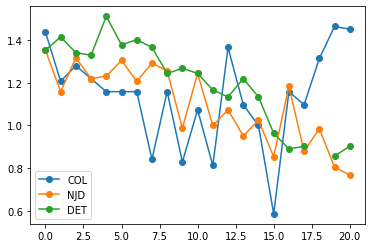

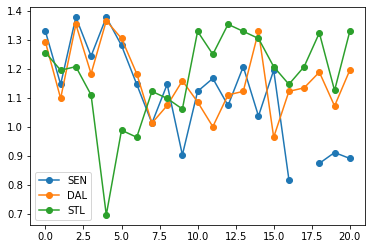

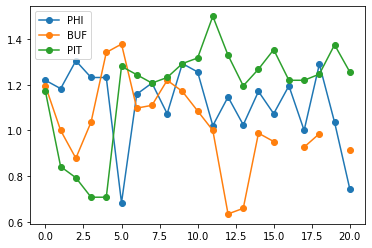

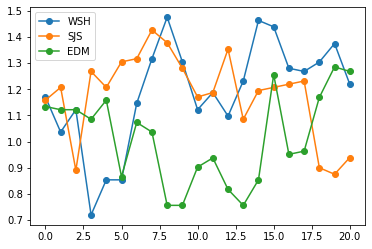

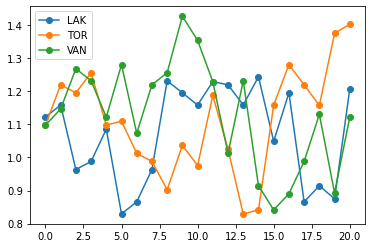

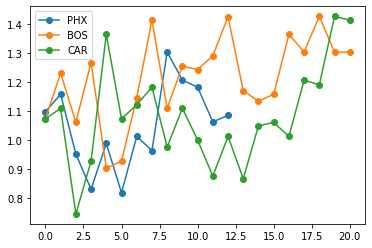

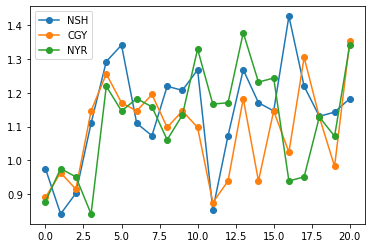

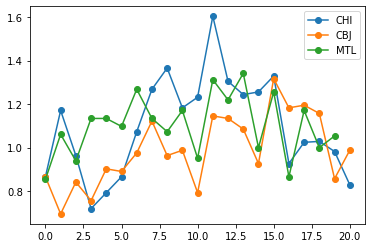

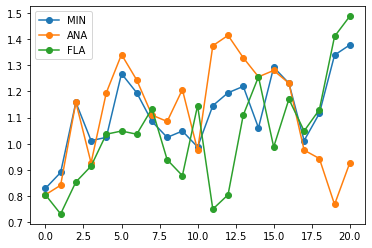

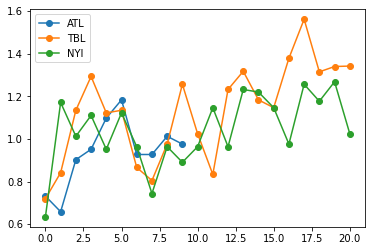

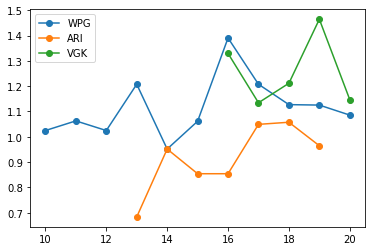

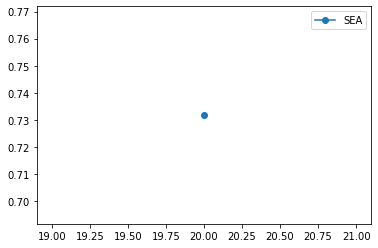

In [5]:
for i in range(0,len(points_rate.columns.values),3):
    points_rate.plot(kind = 'line', 
                  y = points_rate.columns.values[i:i+3], 
                  use_index=True, 
                  style='o-')
plt.legend()
plt.show()

# tmstats EDA; Exclude the characteristics of each team and years

In [6]:
dfall['W/GP'] = dfall['W']/dfall['GP']
dfall['P/GP'] = dfall['PTS']/dfall['GP']

In [7]:
see_cloumn = np.array(['AvAge', 'W/GP', 'P/GP', 'W', 'PTS', 'GF/G', 'GA/G',
                       'SRS', 'SOS', 'PP%', 'PPA'])

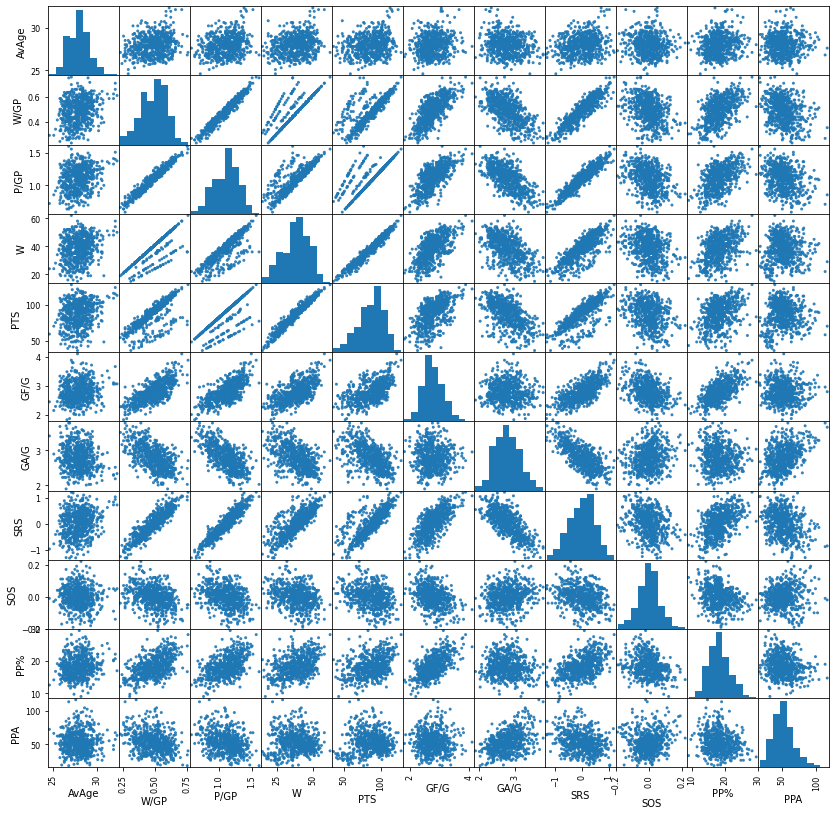

In [8]:
scatter_matrix(dfall[see_cloumn], figsize=(14,14), alpha=.9)
plt.show()

# skaters EDA

In [10]:
skaters_all = pd.read_csv('../skaters/skaters_allyears.csv')
skaters_all.sample(1)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
4954,500.0,Alec Martinez\martial01,28.0,LAK,D,78.0,10.0,21.0,31.0,16.0,...,124.0,8.1,1650.0,21:09,182.0,164.0,0.0,0.0,NaN,2015_2016


In [11]:
print(skaters_all.columns)
print(column_names)

Index(['Rk', 'Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%', 'year'],
      dtype='object')
Index(['Rk', 'Team', 'AvAge', 'GP', 'W', 'L', 'OL', 'PTS', 'PTS%', 'GF', 'GA',
       'SOW', 'SOL', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PP', 'PPO', 'PP%', 'PPA',
       'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SA', 'SV%',
       'SO', '5v5 TOI/GP', 'SAT%', 'Hits', 'Hits/60', 'BkS', 'BkS/60', 'GvA',
       'GvA/60', 'TkA', 'TkA/60', 'ENG', 'MsS', 'year', 'TeamAbbrevs'],
      dtype='object')


In [12]:
print(skaters_all['year'].unique())
teams_name = dfall['TeamAbbrevs'].unique()
print()
print(teams_name)

['2010_2011' '2011_2012' '2012_2013' '2013_2014' '2014_2015' '2015_2016'
 '2016_2017' '2017_2018' '2018_2019' '2019_2020' '2020_2021' '2021_2022']

['COL' 'NJD' 'DET' 'SEN' 'DAL' 'STL' 'PHI' 'BUF' 'PIT' 'WSH' 'SJS' 'EDM'
 'LAK' 'TOR' 'VAN' 'PHX' 'BOS' 'CAR' 'NSH' 'CGY' 'NYR' 'CHI' 'CBJ' 'MTL'
 'MIN' 'ANA' 'FLA' 'ATL' 'TBL' 'NYI' 'WPG' 'ARI' 'VGK' 'SEA']


### As the difference of ATOI/TOI/GP, when analyze the skaters, should the data  be weighted with ATOI/GP?

In [13]:
skaters_all.loc[skaters_all['Player'] == 'Colby Cohen\\cohenco01']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
135,136.0,Colby Cohen\cohenco01,21.0,COL,D,3.0,0.0,0.0,0.0,-1.0,...,2.0,0.0,53.0,17:44,3.0,4.0,0.0,0.0,NaN,2010_2011


In [14]:
skaters_all.loc[skaters_all['Player'] == 'Justin Abdelkader\\abdelju01']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,1.0,Justin Abdelkader\abdelju01,23.0,DET,LW,74.0,7.0,12.0,19.0,15.0,...,129.0,5.4,910.0,12:18,39.0,188.0,227.0,203.0,52.8,2010_2011
891,1.0,Justin Abdelkader\abdelju01,24.0,DET,LW,81.0,8.0,14.0,22.0,4.0,...,121.0,6.6,997.0,12:19,42.0,148.0,239.0,213.0,52.9,2011_2012
1782,1.0,Justin Abdelkader\abdelju01,25.0,DET,LW,48.0,10.0,3.0,13.0,6.0,...,96.0,10.4,711.0,14:49,13.0,120.0,65.0,60.0,52.0,2012_2013
2674,2.0,Justin Abdelkader\abdelju01,26.0,DET,LW,70.0,10.0,18.0,28.0,2.0,...,147.0,6.8,1070.0,15:17,31.0,172.0,23.0,32.0,41.8,2013_2014
3564,1.0,Justin Abdelkader\abdelju01,27.0,DET,LW,71.0,23.0,21.0,44.0,3.0,...,154.0,14.9,1272.0,17:55,28.0,153.0,7.0,8.0,46.7,2014_2015
4455,1.0,Justin Abdelkader\abdelju01,28.0,DET,LW,82.0,19.0,23.0,42.0,-16.0,...,155.0,12.3,1512.0,18:26,44.0,207.0,5.0,9.0,35.7,2015_2016
5347,2.0,Justin Abdelkader\abdelju01,29.0,DET,LW,64.0,7.0,14.0,21.0,-20.0,...,104.0,6.7,1066.0,16:40,27.0,144.0,5.0,12.0,29.4,2016_2017
6237,1.0,Justin Abdelkader\abdelju01,30.0,DET,LW,75.0,13.0,22.0,35.0,-11.0,...,110.0,11.8,1241.0,16:33,40.0,174.0,47.0,50.0,48.5,2017_2018
7128,1.0,Justin Abdelkader\abdelju01,31.0,DET,LW,71.0,6.0,13.0,19.0,-14.0,...,95.0,6.3,1093.0,15:24,34.0,185.0,52.0,51.0,50.5,2018_2019
8019,1.0,Justin Abdelkader\abdelju01,32.0,DET,LW,49.0,0.0,3.0,3.0,-14.0,...,40.0,0.0,565.0,11:32,26.0,103.0,38.0,31.0,55.1,2019_2020


In [15]:
skaters_all.loc[(skaters_all['year'] == '2010_2011') & ((skaters_all['Tm'] == 'COL'))]

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
135,136.0,Colby Cohen\cohenco01,21.0,COL,D,3.0,0.0,0.0,0.0,-1.0,...,2.0,0.0,53.0,17:44,3.0,4.0,0.0,0.0,NaN,2010_2011
161,162.0,Kyle Cumiskey\cumisky01,24.0,COL,D,18.0,1.0,7.0,8.0,-3.0,...,21.0,4.8,354.0,19:40,27.0,9.0,0.0,0.0,NaN,2010_2011
188,189.0,Matt Duchene\duchema01,20.0,COL,C,80.0,27.0,40.0,67.0,-8.0,...,202.0,13.4,1516.0,18:57,48.0,57.0,628.0,618.0,50.4,2010_2011
193,194.0,Philippe Dupuis\dupuiph01,25.0,COL,C,74.0,6.0,11.0,17.0,-4.0,...,101.0,5.9,674.0,9:07,28.0,128.0,153.0,178.0,46.2,2010_2011
235,236.0,Adam Foote\footead01,39.0,COL,D,47.0,0.0,8.0,8.0,-9.0,...,23.0,0.0,842.0,17:56,67.0,55.0,0.0,0.0,NaN,2010_2011
236,237.0,Peter Forsberg*\forsbpe01,37.0,COL,C,2.0,0.0,0.0,0.0,-4.0,...,3.0,0.0,35.0,17:35,0.0,3.0,0.0,0.0,NaN,2010_2011
250,251.0,T.J. Galiardi\galiatj01,22.0,COL,LW,35.0,7.0,8.0,15.0,-6.0,...,62.0,11.3,567.0,16:12,19.0,41.0,62.0,72.0,46.3,2010_2011
252,253.0,Cameron Gaunce\gauncca01,20.0,COL,D,11.0,1.0,0.0,1.0,-3.0,...,4.0,25.0,140.0,12:44,7.0,10.0,0.0,0.0,NaN,2010_2011
321,322.0,Milan Hejduk\hejdumi01,34.0,COL,RW,71.0,22.0,34.0,56.0,-23.0,...,170.0,12.9,1273.0,17:55,31.0,9.0,2.0,3.0,40.0,2010_2011
337,338.0,Jonas Holos\holosjo01,23.0,COL,D,39.0,0.0,6.0,6.0,-3.0,...,36.0,0.0,704.0,18:03,32.0,19.0,0.0,0.0,NaN,2010_2011
